## Clustering Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clusters.csv')
print(data.shape)
data.head()

(1000, 3)


,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


The challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

The data appears to be scaled, so i go directly to clustering.

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

WCSS: [4721.7406309664375, 1727.541929276537, 1190.4710264609002, 960.9147079692091, 882.6093965573676, 809.6898100848445, 745.7933702278783, 689.4085429921388, 636.6625968018176, 600.0684769772117]


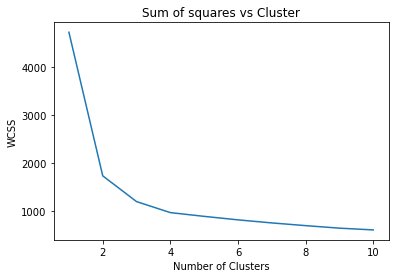

In [4]:
# KMeans with elbow plot to see the optimum numbber of clusters present in the data
wcss = []
for i in list(range(1,11)):
    kmeans = KMeans(n_clusters=i)
    #fit the data
    kmeans.fit(data.values)
    #the within cluster sum of squares
    wcss.append(kmeans.inertia_)
print(f"WCSS: {wcss}")

plt.title('Sum of squares vs Cluster')
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

* Optimal number of clusters is 4

In [5]:
# KMmeans Clustering

model = KMeans(n_clusters=4)
#fit and predict
clusters = model.fit_predict(data.values)
#view the clusters
clusters

array([1, 1, 3, 3, 1, 1, 3, 0, 1, 1, 3, 2, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0,
       1, 1, 0, 2, 3, 1, 2, 0, 2, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 2,
       3, 1, 1, 3, 3, 0, 1, 2, 3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 3, 2, 0, 0, 3, 2, 0, 0, 0, 1, 2, 0, 2, 3, 2, 0, 3, 2, 0,
       0, 2, 2, 2, 3, 0, 2, 0, 3, 0, 3, 2, 0, 2, 3, 2, 0, 2, 3, 0, 0, 3,
       0, 2, 1, 1, 2, 3, 2, 3, 1, 2, 0, 2, 3, 3, 1, 0, 2, 0, 3, 1, 2, 2,
       2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 3, 3, 0, 3, 0, 0, 3, 1, 1, 0,
       1, 2, 1, 0, 0, 0, 2, 1, 3, 3, 0, 2, 2, 1, 1, 3, 1, 2, 0, 3, 0, 2,
       2, 0, 0, 1, 0, 1, 2, 2, 0, 3, 1, 3, 3, 2, 2, 1, 2, 0, 3, 2, 0, 0,
       1, 3, 2, 3, 3, 3, 1, 1, 3, 0, 3, 1, 3, 3, 2, 1, 3, 0, 0, 3, 1, 3,
       0, 1, 2, 3, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 3, 3, 1, 3, 2, 3, 2,
       3, 0, 0, 2, 3, 1, 1, 0, 3, 0, 2, 2, 3, 3, 3, 1, 3, 1, 0, 3, 3, 0,
       1, 0, 2, 2, 2, 0, 3, 1, 0, 2, 1, 2, 3, 0, 0, 1, 3, 3, 2, 1, 1, 3,
       3, 2, 3, 1, 1, 2, 1, 3, 3, 3, 0, 0, 2, 1, 3,

#### Create a 2D representation of the data

In [6]:
pca = PCA(n_components=2).fit(data.values)
data_2d = pca.transform(data.values)
data_2d[0:10]

array([[ 2.43020019, -0.19793599],
       [ 3.50286676, -0.78094444],
       [-1.91736031,  0.00791411],
       [-2.99056516, -0.30165203],
       [ 2.81174548, -0.4277004 ],
       [ 2.65352077, -0.17673168],
       [-3.60534312,  0.5323295 ],
       [-0.82793549,  0.97824057],
       [ 2.93166658,  0.28907273],
       [ 3.60945106,  0.41852241]])

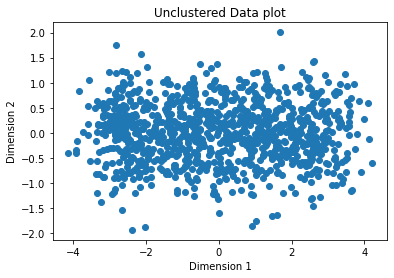

In [7]:
# Plot unclustered data points
plt.scatter(data_2d[:,0],data_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Unclustered Data plot')
plt.show()

##### Plot KMeans clustered points 

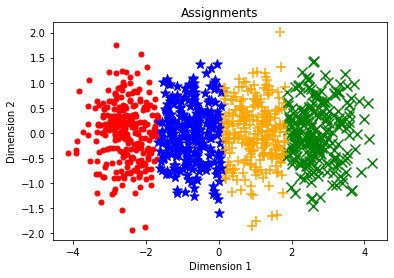

In [8]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange',3:'red'}
    mrk_dic = {0:'*',1:'x',2:'+',3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(data_2d, clusters)

#### Trying agglomerative clustering

In [9]:
agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(data.values)
agg_clusters

array([1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 1, 3, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2, 1, 2, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 1, 2, 3, 2, 0, 1, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0,
       2, 1, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 2, 3, 2, 3,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2,

##### Plot Agglomerative clustered points

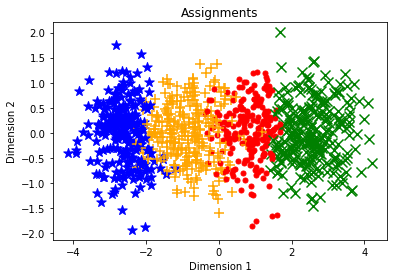

In [10]:
plot_clusters(data_2d,agg_clusters)

* We have a similar clustering using Agglomerative Clustering